In [1]:
# custom data transform for removing columns with few unique values
from numpy import unique, mean, std, where, logical_or
from pandas import read_csv
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel ('CREDIT.xls')
print(df.shape)
df.head()

(30000, 24)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.dtypes

X1     int64
X2     int64
X3     int64
X4     int64
X5     int64
X6     int64
X7     int64
X8     int64
X9     int64
X10    int64
X11    int64
X12    int64
X13    int64
X14    int64
X15    int64
X16    int64
X17    int64
X18    int64
X19    int64
X20    int64
X21    int64
X22    int64
X23    int64
Y      int64
dtype: object

#### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:		


X1 = Amount of the given credit (NT dollar).	
X2 = Gender (1 = male; 2 = female).	
X3 = Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).	
X4 = Marital status (1 = married; 2 = single; 3 = others).	
X5 = Age(year)	
X6 = History of past payment the repayment status in September, 2005; 	
X7 = the repayment status in Agustus  2005	
X8 = the repayment status in July, 2005	
X9 = the repayment status in June, 2005	
X10 = the repayment status in Mei, 2005	
X11 = the repayment status in April, 2005. 	
X12 = amount of bill statement in September, 2005.	Amount of bill statement (NT dollar).	 
X13 = amount of bill statement in August, 2005.	
X14 = amount of bill statement in July, 2005.	
X15	amount of bill statement in June, 2005.	
X16	amount of bill statement in Mei, 2005.	
X17	amount of bill statement in April, 2005.	
X18	amount paid in September, 2005.	X18-X23:Amount of previous payment (NT dollar).	
X19	amount paid in August, 2005.	
X20	amount paid in July, 2005.	
X21	amount paid in June, 2005.	
X22	amount paid in Mei, 2005.	
X23	amount paid in April, 2005.	
Y	default payment next month	Target Variable,  default payment (Yes = 1, No = 0)

### Convert to DATA TYPE

In [4]:
df["X3"] = df["X3"].astype('category')
df["X4"] = df["X4"].astype('category')

In [5]:
df.dtypes

X1        int64
X2        int64
X3     category
X4     category
X5        int64
X6        int64
X7        int64
X8        int64
X9        int64
X10       int64
X11       int64
X12       int64
X13       int64
X14       int64
X15       int64
X16       int64
X17       int64
X18       int64
X19       int64
X20       int64
X21       int64
X22       int64
X23       int64
Y         int64
dtype: object

In [6]:
df.describe()

,X1,X2,X5,X6,X7,X8,X9,X10,X11,X12,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
# Collecting X and Y
x = df["X12"].values
y = df["Y"].values

In [8]:
# Mean X and Y
mean_x = np.mean(x)
mean_y = np.mean(y)

In [9]:
# Total number of values
n = len(x)

In [10]:
# Using the formula to calculate m and c
numer = 0
denom = 0
for i in range(n):
    numer += (x[i] - mean_x) * (y[i] - mean_y)
    denom += (x[i] - mean_x) ** 2
    m = numer / denom
    print("gradient : "+str(m))
    c = mean_y - (m * mean_x)
    print("coeficient : "+str(c))


gradient : -1.6461520881055597e-05
coeficient : 1.0644139312075704
gradient : -1.624742970550366e-05
coeficient : 1.0534474680795036
gradient : -1.3743314810215394e-05
coeficient : 0.9251783621865339
gradient : -1.351121833041375e-05
coeficient : 0.9132896074009291
gradient : -8.59859572153527e-06
coeficient : 0.6616487139195255
gradient : -8.799275294248918e-06
coeficient : 0.6719281900775071
gradient : -1.2326913837516387e-06
coeficient : 0.2843425586474891
gradient : -1.1352953223399172e-06
coeficient : 0.27935360796543973
gradient : -1.0390047615299253e-06
coeficient : 0.27442128470652294
gradient : -9.148031820887627e-07
coeficient : 0.26805926610450564
gradient : -8.245859222462966e-07
coeficient : 0.2634380375507037
gradient : -7.397223738731127e-07
coeficient : 0.259091043931036
gradient : -6.567588555590843e-07
coeficient : 0.2548413761798083
gradient : -5.593958778726507e-07
coeficient : 0.2498541201563668
gradient : -5.942955100453265e-07
coeficient : 0.251641795563436
gradi

In [11]:
# Plotting Values and Regression Line
max_x = np.max(x) + 100
min_x = np.min(x) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 50)
y = c + m * x 

print (y)


[0.24521728 0.2426631  0.24010892 0.23755474 0.23500056 0.23244637
 0.22989219 0.22733801 0.22478383 0.22222964 0.21967546 0.21712128
 0.2145671  0.21201292 0.20945873 0.20690455 0.20435037 0.20179619
 0.199242   0.19668782 0.19413364 0.19157946 0.18902528 0.18647109
 0.18391691 0.18136273 0.17880855 0.17625436 0.17370018 0.171146
 0.16859182 0.16603764 0.16348345 0.16092927 0.15837509 0.15582091
 0.15326672 0.15071254 0.14815836 0.14560418 0.14305    0.14049581
 0.13794163 0.13538745 0.13283327 0.13027908 0.1277249  0.12517072
 0.12261654 0.12006236]


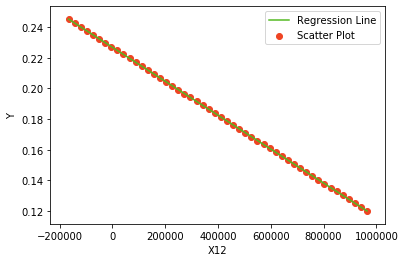

In [12]:
# Ploting Line
ax = plt.plot(x, y, color='#52b920', label='Regression Line')
# Ploting Scatter Points
ax = plt.scatter(x, y, c='#ef4423', label='Scatter Plot')
plt.xlabel('X12')
plt.ylabel('Y')
plt.legend()
plt.show()

In [13]:
# Collecting X and Y
X = df["X1"].values
y = df["X3"].values

display(y)

[2, 2, 2, 2, 2, ..., 3, 3, 2, 3, 2]
Length: 30000
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

display(y_test)


[1, 2, 1, 2, 1, ..., 2, 1, 3, 2, 2]
Length: 6000
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

In [16]:
from sklearn.linear_model import LinearRegression

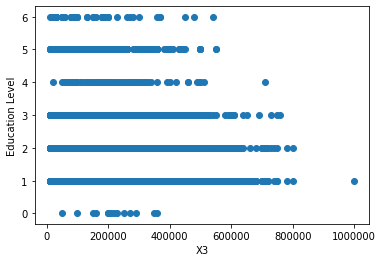

In [17]:
plt.scatter(X,y)
plt.xlabel("X3")
plt.ylabel("Education Level")
plt.show()

In [18]:
# Group data by number of listings per year
df_example = df.groupby(by = 'X3').agg({'X3': 'count'})

display (df_example)

,X3
X3,
0,14
1,10585
2,14030
3,4917
4,123
5,280
6,51


In [19]:
# Group data by number of listings per year
df_example = df.groupby(by = 'X1').agg({'X1': 'count'})

display (df_example)

,X1
X1,
10000,493
16000,2
20000,1976
30000,1610
40000,230
...,...
750000,4
760000,1
780000,2


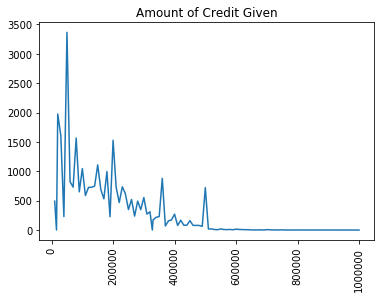

In [20]:
# Plot time series data
f, ax = plt.subplots(1,1)
ax.plot(df_example['X1'])

# Add title
ax.set_title('Amount of Credit Given')

# Rotate x-labels
ax.tick_params(axis = 'x', rotation = 90)

# Show graph
show = plt.show()
plt.close()

In [21]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


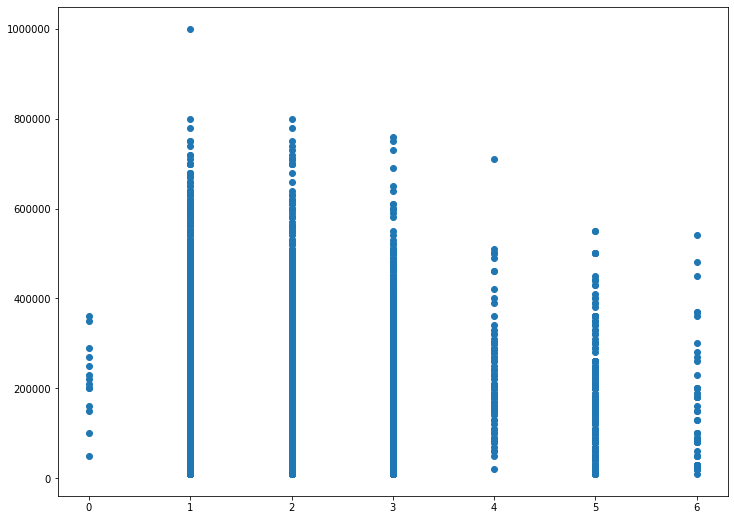

In [22]:
plt.rcParams['figure.figsize'] = (12.0, 9.0)

X = df['X3'].to_numpy()
Y = df['X1'].to_numpy()
plt.scatter(X, Y)
plt.show()

In [23]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(x)) # Number of elements in X

In [24]:
X * m + c

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m * X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

-35978.514866073434 234157.3020348277


### Histogram

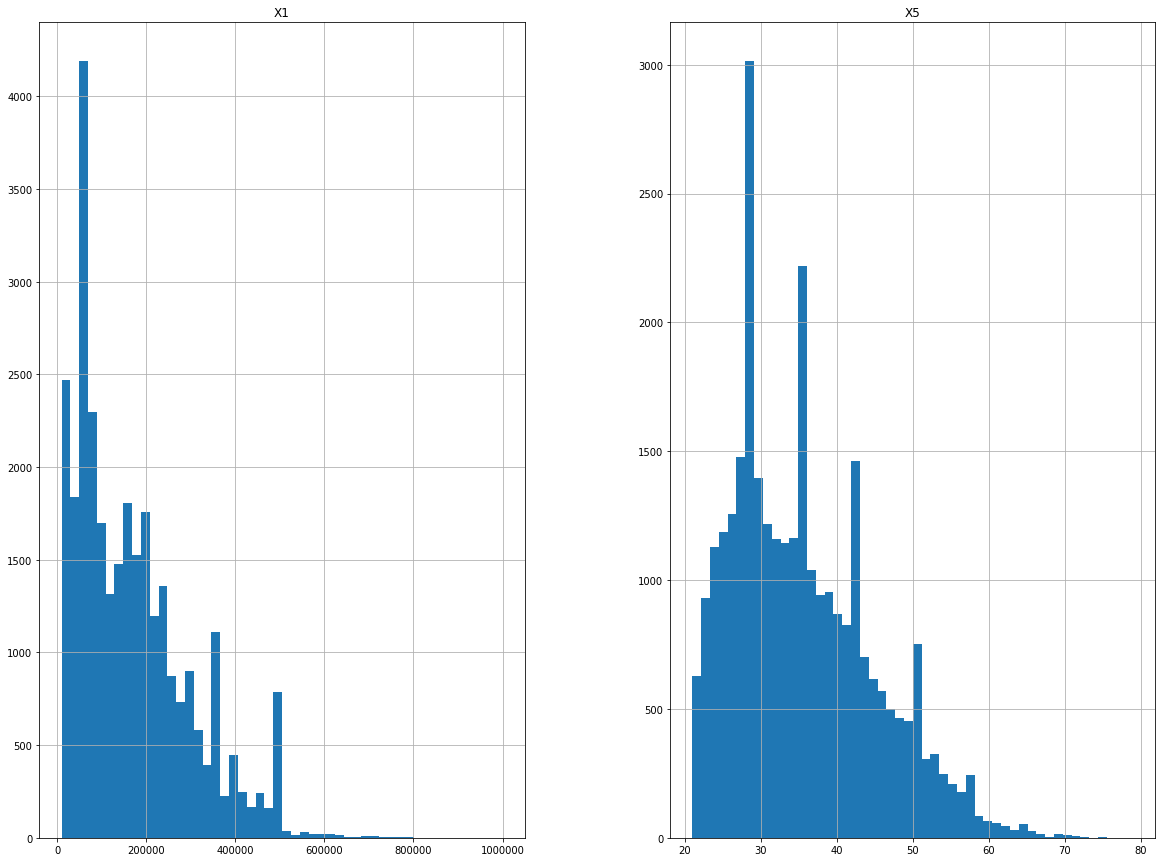

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
df[['X1', 'X5']].hist(bins=50, figsize=(20,15))
plt.show()

### Calculate correlation

In [27]:
df['X1'].corr(df['X3'])

-0.21916069822921255

In [28]:
df['X1'].corr(df['X4'])

-0.10813941027801238

In [29]:
df['X1'].corr(df['Y'])

-0.15351987639350764

# Number of people who will pay for next month

Default to pay ( 0 = No , 1 = Yes)

Y
0    23364
1     6636
dtype: int64


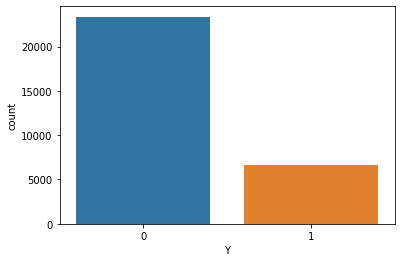

In [35]:
from sklearn.model_selection import train_test_split
import seaborn as sns

print(df.groupby('Y').size())
sns.countplot(df['Y'],label="Count")
plt.show()

# Clasification - Decison Tree

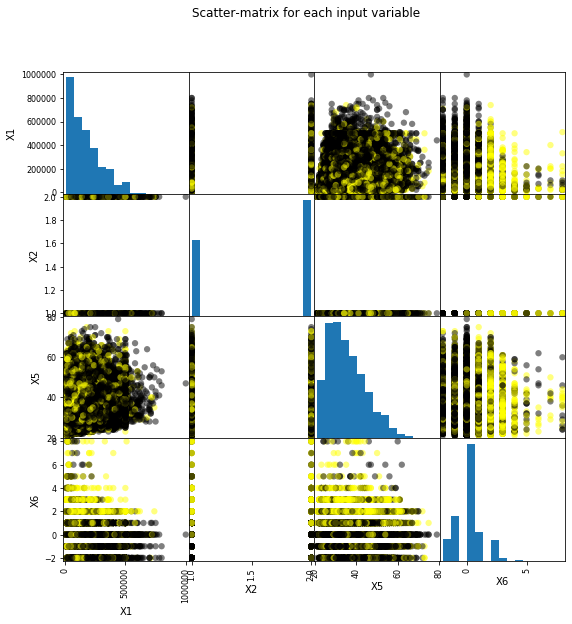

In [56]:
from pandas.plotting import scatter_matrix 
from matplotlib import cm

feature_names = ['X1', 'X2', 'X3', 'X4','X5','X6']
X = df[feature_names]
y = df['Y']
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')


In [57]:
# Create Training and Test Sets and Apply Scaling
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))


Accuracy of Logistic regression classifier on training set: 0.80
Accuracy of Logistic regression classifier on test set: 0.81


# Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))


Accuracy of Decision Tree classifier on training set: 0.93
Accuracy of Decision Tree classifier on test set: 0.75


# K-Nearest Neighbors

In [66]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))


Accuracy of K-NN classifier on training set: 0.84
Accuracy of K-NN classifier on test set: 0.80


# Naive Bayes

In [67]:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

print ()
y_predict = gnb.predict(X_test)
print()

#print(gnb.predict_proba(X))
print(y_predict)
print()
print(confusion_matrix(y_test, y_predict))
print()
print(classification_report(y_test, y_predict))
print()


Accuracy of GNB classifier on training set: 0.82
Accuracy of GNB classifier on test set: 0.83


[0 0 0 ... 0 0 0]

[[5657  211]
 [1098  534]]

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      5868
           1       0.72      0.33      0.45      1632

    accuracy                           0.83      7500
   macro avg       0.78      0.65      0.67      7500
weighted avg       0.81      0.83      0.80      7500




# Linear Discriminant Analysis

In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.81
Accuracy of LDA classifier on test set: 0.82


# Support Vector Machine

In [69]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))


Accuracy of SVM classifier on training set: 0.82
Accuracy of SVM classifier on test set: 0.83


# Confusion Matrix

#### KNN

In [73]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


[[5418  450]
 [1071  561]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.88      5868
           1       0.55      0.34      0.42      1632

    accuracy                           0.80      7500
   macro avg       0.69      0.63      0.65      7500
weighted avg       0.77      0.80      0.78      7500



#### SVM

In [72]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = svm.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[5670  198]
 [1108  524]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      5868
           1       0.73      0.32      0.45      1632

    accuracy                           0.83      7500
   macro avg       0.78      0.64      0.67      7500
weighted avg       0.81      0.83      0.80      7500



#### Linear Discriminant

In [74]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = lda.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[5717  151]
 [1229  403]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5868
           1       0.73      0.25      0.37      1632

    accuracy                           0.82      7500
   macro avg       0.78      0.61      0.63      7500
weighted avg       0.80      0.82      0.78      7500



### Naive Bayes 

In [77]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = gnb.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[5657  211]
 [1098  534]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      5868
           1       0.72      0.33      0.45      1632

    accuracy                           0.83      7500
   macro avg       0.78      0.65      0.67      7500
weighted avg       0.81      0.83      0.80      7500



### Logistic Regression

In [78]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = logreg.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[5745  123]
 [1271  361]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      5868
           1       0.75      0.22      0.34      1632

    accuracy                           0.81      7500
   macro avg       0.78      0.60      0.62      7500
weighted avg       0.80      0.81      0.77      7500



### Decision Tree

In [79]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[5053  815]
 [1064  568]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      5868
           1       0.41      0.35      0.38      1632

    accuracy                           0.75      7500
   macro avg       0.62      0.60      0.61      7500
weighted avg       0.74      0.75      0.74      7500

